## Evaluating Model Performance

Why are we evaluating a ML model's performance? To measure the quality of the model. Measuring the quality (predictive accuracy, in this case) is the key to iteratively improving the models. Will the model's predictions be close to what actually happens? We will have to evaluate.

We now have a function "predict_price" to make predictions. This function can predict the price of any living space we want to list, as long as we know the number of people it can accomodate.

This function we have just written represents a "Machine Learning Model". Which means that it outputs a prediction based on the input to the model.

## Function to predict price 

In [3]:
import pandas as pd

# read csv
dc_listings = pd.read_csv("/Users/brindhamanivannan/Datasets/dc_airbnb.csv")
dc_listings

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,100%,60%,1,4,Entire home/apt,1.0,1.0,2.0,$135.00,$45.00,$400.00,3,60,19,38.885492,-76.987765,Washington,20003,DC
3719,100%,50%,1,2,Private room,1.0,2.0,1.0,$79.00,NaN,NaN,3,365,36,38.889401,-76.986646,Washington,20003,DC
3720,100%,100%,2,6,Entire home/apt,2.0,1.0,3.0,$275.00,$100.00,$500.00,2,2147483647,12,38.889533,-77.001010,Washington,20003,DC
3721,88%,100%,1,2,Entire home/apt,1.0,1.0,1.0,$179.00,$25.00,NaN,2,21,48,38.890815,-77.002283,Washington,20002,DC


In [4]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   object 
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude            

In [5]:
dc_listings['price']

0       $160.00
1       $350.00
2        $50.00
3        $95.00
4        $50.00
         ...   
3718    $135.00
3719     $79.00
3720    $275.00
3721    $179.00
3722    $110.00
Name: price, Length: 3723, dtype: object

In [6]:
type(dc_listings['price'])

pandas.core.series.Series

In [7]:
dc_listings['price'].dtypes

dtype('O')

In [8]:
import numpy as np

dc_listings = pd.read_csv("/Users/brindhamanivannan/Datasets/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)

acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

print(acc_one)
print(acc_two)
print(acc_four)

80.0
82.6
148.0


## Testing quality of predictions -  train/test validation

#### Train-Test Split for Evaluating Machine Learning Model Performance

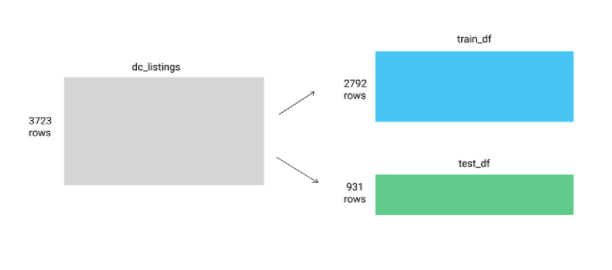

In [9]:
# Function to predict the price for just the rows in the test set

import pandas as pd
import numpy as np
dc_listings = pd.read_csv("/Users/brindhamanivannan/Datasets/dc_airbnb.csv")


In [10]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [11]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

In [12]:
print(train_df.shape)
print(test_df.shape)

(2792, 19)
(931, 19)


In [13]:
train_df.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,160.0,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,350.0,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC


In [14]:
test_df.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
2792,20%,75%,1,2,Entire home/apt,0.0,1.0,1.0,120.0,NaN,NaN,1,1125,8,38.922187,-77.032475,Washington,20009,DC
2793,100%,25%,2,3,Entire home/apt,2.0,2.0,1.0,140.0,$75.00,$150.00,2,1125,7,38.931681,-77.044739,Washington,20010,DC


In [15]:
def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy - a new object will be created with a copy of the calling object’s data and indices
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

#test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)
test_df['predicted_price'] = test_df['accommodates'].apply(lambda x: predict_price(x))

# Here's how you use the apply method to pass all of the values in the accommodates column through the function: test_df['accommodates'].apply(lambda x: predict_price(x))

<ipython-input-15-f376d8f5a0ea>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_price'] = test_df['accommodates'].apply(lambda x: predict_price(x))


In [16]:
test_df['predicted_price']

2792    104.0
2793    177.4
2794    145.8
2795    177.4
2796    187.2
        ...  
3718    145.8
3719    104.0
3720    187.2
3721    104.0
3722    177.4
Name: predicted_price, Length: 931, dtype: float64

## Error Metric

Why error metrics? 
To quantify how good the predictions were on the test set. In our case, it tells how off our predicted price values are from the actual price values for the living spaces in the dataset.

Not so effective error metric - Mean error - difference between each predicted and actual value and then averaging these differences.

Mean error treats a positive difference differently than a negative difference, but we're really interested in how far off the prediction is in either the positive or negative direction. So we will use Mean absolute error that does not care about the signs + or -, ie, 3=3, -3=3 

If the true price was 200 dollars and the model predicted 210 or 190 it's off by 10 dollars either way.

## Mean absolute error

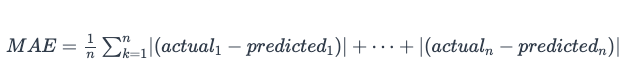

In [17]:
import numpy as np
test_df["error"] = np.absolute(test_df["predicted_price"] - test_df["price"])
mae = test_df["error"].mean()
print(mae)

56.29001074113876


<ipython-input-17-063eade6078d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["error"] = np.absolute(test_df["predicted_price"] - test_df["price"])


## Mean squared error

For many prediction tasks, we want to penalize predicted values that are further away from the actual value far more than those closer to the actual value.

Why mse? It makes the gap between the predicted and actual values more clear.

A prediction that's off by 100 dollars will have an error (of 10,000) that's 100 times more than a prediction that's off by only 10 dollars (which will have an error of 100).

In [18]:
# calculate mse

test_df['mean_squared_error'] = (test_df["price"] - test_df["predicted_price"]) ** 2
mse = test_df['mean_squared_error'].mean()
print(mse)

18646.525370569325


<ipython-input-18-a79fab8492a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['mean_squared_error'] = (test_df["price"] - test_df["predicted_price"]) ** 2


The model we trained achieved a mean squared error of around 18646.5. Is this a high or a low mean squared error value? What does this tell us about the quality of the predictions and the model? By itself, the mean squared error value for a single model isn't all that useful.

## Training Another Model

Let's train another model, this time using the bathrooms column, and compare MSE values.

In [19]:
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
print(mse)

18405.444081632548


<ipython-input-19-a0982483de4c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
<ipython-input-19-a0982483de4c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)


While comparing MSE values helps us identify which model performs better on a relative basis, it doesn't help us understand if the performance is good enough in general. This is because the units of the MSE metric are squared (in this case, dollars squared). An MSE value of 16377.5 dollars squared doesn't give us an intuitive sense of how far off the model's predictions are from the true price value in dollars.


## Root mean squared error

Root mean squared error is an error metric whose units are the base unit (in our case, dollars). RMSE for short, this error metric is calculated by taking the square root of the MSE value

Since the RMSE value uses the same units as the target column, we can understand how far off in real dollars we can expect the model to perform.

Let's calculate the RMSE value of the model we trained using the bathrooms column.

In [20]:
import numpy as np
def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
rmse = np.sqrt(mse)
print(rmse)

135.6666653295221


<ipython-input-20-86f8c6425e29>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
<ipython-input-20-86f8c6425e29>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)


The model achieved an RMSE value of approximately 135.6, which implies that we should expect for the model to be off by 135.6 dollars on average for the predicted price values. Given that most of the living spaces are listed at just a few hundred dollars, we need to reduce this error as much as possible to improve the model's usefulness.